In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

🔍 Puntaje de simetría horizontal (menor es más simétrico): 19.59
🔍 Nivel de nitidez (mayor es más nítido): 340.04


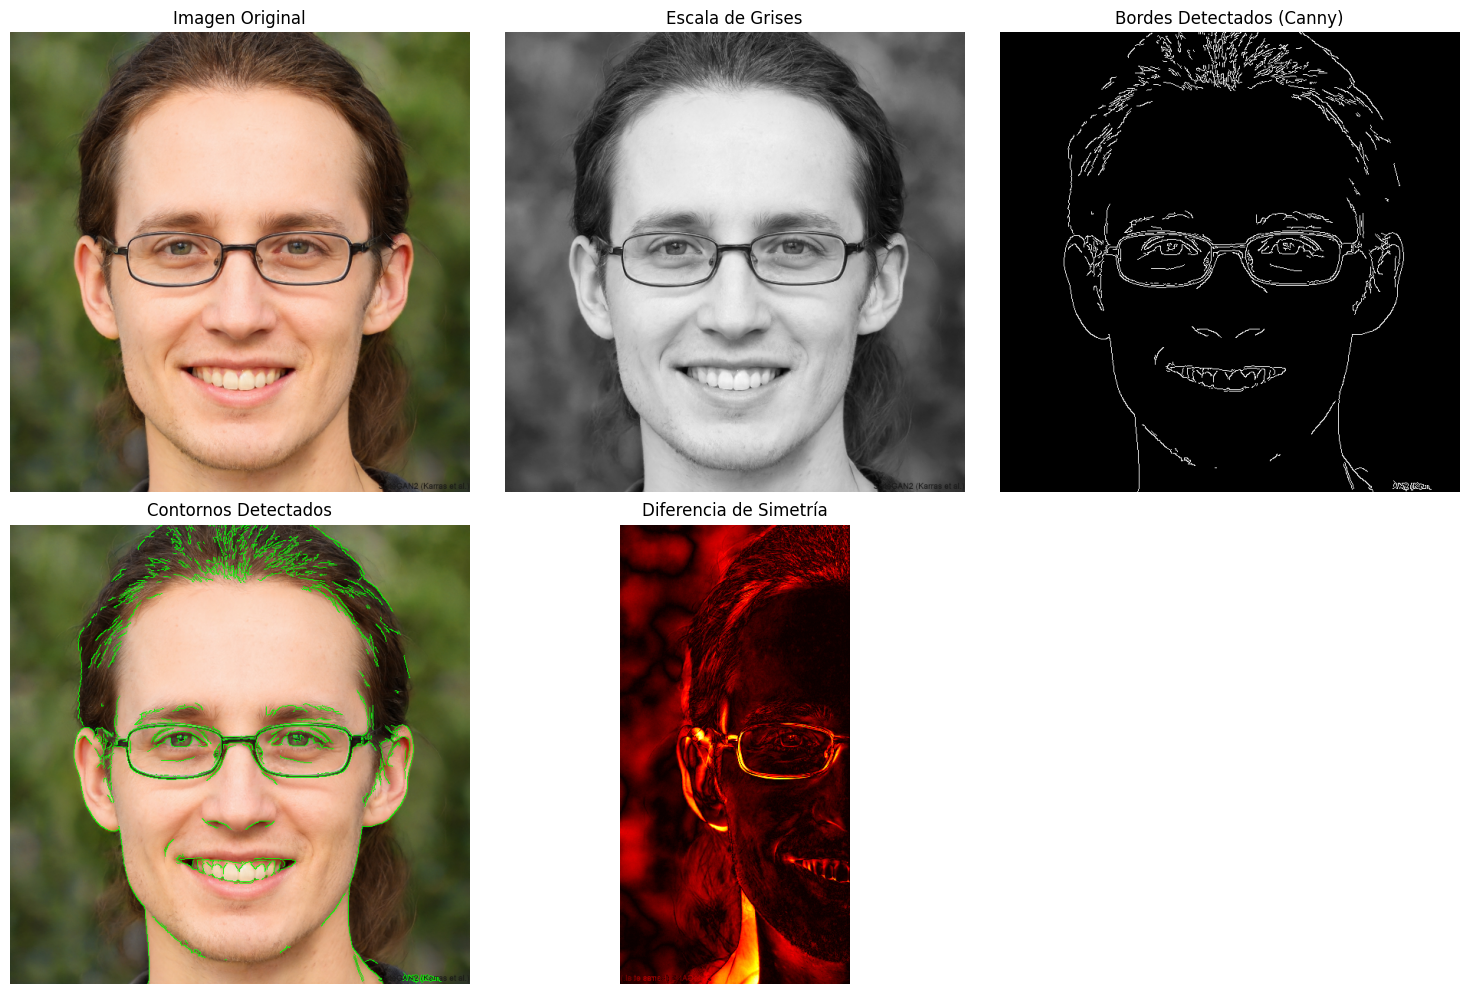

In [4]:
# --- 1. Cargar la imagen
imagen = cv2.imread('fake_face.jpg')

# Verificar si la imagen se cargó correctamente
if imagen is None:
    raise Exception("No se pudo cargar la imagen. Verifica la ruta y el nombre del archivo.")

# Redimensionar la imagen para facilitar el procesamiento (opcional)
imagen = cv2.resize(imagen, (600, 600))

# --- 2. Convertir a escala de grises
gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# --- 3. Detección de bordes con Canny
bordes = cv2.Canny(gris, 100, 200)

# --- 4. Detección de contornos
contornos, _ = cv2.findContours(bordes, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
imagen_contornos = imagen.copy()
cv2.drawContours(imagen_contornos, contornos, -1, (0, 255, 0), 1)

# --- 5. Evaluación de simetría horizontal
altura, ancho = gris.shape
izquierda = gris[:, :ancho // 2]
derecha = cv2.flip(gris[:, ancho // 2:], 1)  # Voltear horizontalmente la mitad derecha
diferencia = cv2.absdiff(izquierda, derecha)
puntaje_simetria = np.mean(diferencia)
print(f"🔍 Puntaje de simetría horizontal (menor es más simétrico): {puntaje_simetria:.2f}")

# --- 6. Detección de regiones borrosas usando la varianza del Laplaciano
varianza_laplaciana = cv2.Laplacian(gris, cv2.CV_64F).var()
print(f"🔍 Nivel de nitidez (mayor es más nítido): {varianza_laplaciana:.2f}")

# --- 7. Mostrar las imágenes resultantes usando matplotlib
plt.figure(figsize=(15, 10))

# Imagen original
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original")
plt.axis('off')

# Escala de grises
plt.subplot(2, 3, 2)
plt.imshow(gris, cmap='gray')
plt.title("Escala de Grises")
plt.axis('off')

# Bordes detectados
plt.subplot(2, 3, 3)
plt.imshow(bordes, cmap='gray')
plt.title("Bordes Detectados (Canny)")
plt.axis('off')

# Contornos detectados
plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(imagen_contornos, cv2.COLOR_BGR2RGB))
plt.title("Contornos Detectados")
plt.axis('off')

# Diferencia de simetría
plt.subplot(2, 3, 5)
plt.imshow(diferencia, cmap='hot')
plt.title("Diferencia de Simetría")
plt.axis('off')

plt.tight_layout()
plt.show()
